<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="images/book_cover.jpg" width="120">

*This notebook contains an excerpt from the [Python Programming and Numerical Methods - A Guide for Engineers and Scientists](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9), the content is also available at [Berkeley Python Numerical Methods](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html).*

*The copyright of the book belongs to Elsevier. We also have this interactive book online for a better learning experience. The code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work on [Elsevier](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9) or [Amazon](https://www.amazon.com/Python-Programming-Numerical-Methods-Scientists/dp/0128195495/ref=sr_1_1?dchild=1&keywords=Python+Programming+and+Numerical+Methods+-+A+Guide+for+Engineers+and+Scientists&qid=1604761352&sr=8-1)!*

<!--NAVIGATION-->
< [12.2 3D Plotting](chapter12.02-3D-Plotting.ipynb) | [Contents](Index.ipynb) | [12.4 Animations and Movies](chapter12.04-Animaitons-and-Movies.ipynb) >

# Working with Maps

In engineering and science, many times, we have to interact with maps. There are many different Python packages that could draw maps, such as [basemap](https://matplotlib.org/basemap/), [cartopy](https://scitools.org.uk/cartopy/docs/latest/), [folium](https://github.com/python-visualization/folium) and so on. The *folium* package allows you to plot interactive maps for webpages. But most of time, we only need to plot a static map to show some spatial features, and *basemap* and *cartopy* will do the job. In past, *basemap* is the official map package goes with *matplotlib*, but since 2016, it announced that the *cartopy* will replace *basemap*. Therefore, in this section, we will quickly introduce you how to draw maps with data using *cartopy*. You need to install the *cartopy* with *conda install cartopy*. 

The basics of a map is simple: it is a 2D plot with specific [projections](https://en.wikipedia.org/wiki/Map_projection). The x-axis is the longitude ranging from -180 to 180, which specifies the east-west position of a point on the Earth's surface. The y-axis is the latitude ranging from -90 to 90, that describes a point south-north position. If you specify a latitude and longitude pair, we could uniquely determine where the point is on the Earth. 

*cartopy* has very nice API to interact with *matplotlib*, to plot a map, we only need to tell the *matplotlib* to use a specific map projection, and then we can add other map features to the plot. 

**TRY IT!** Plot a world map with *cartopy* using Plate Carrée projection (google it), and draw the coastline on the map. 

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
%matplotlib inline

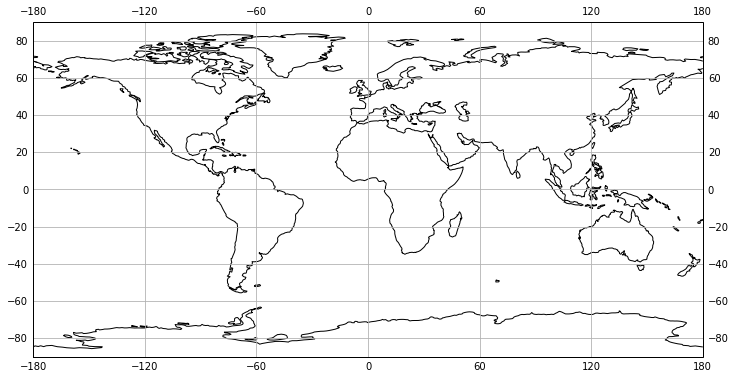

In [2]:
plt.figure(figsize = (12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
plt.show()

In the above example, we plotted the map with the Plate Carrée projection, you can check out other [cartopy supported projections](https://scitools.org.uk/cartopy/docs/v0.16/crs/projections.html#cartopy-projections). Also, we turn on the grid lines and draw the labels on the maps as well. 

The map background we draw above is not so nice, we could easily add a nice map background in cartopy, note that, at the time of writing, the *stock_img* only have one image from a downsampled version of the Natural Earth shaded relief raster. 

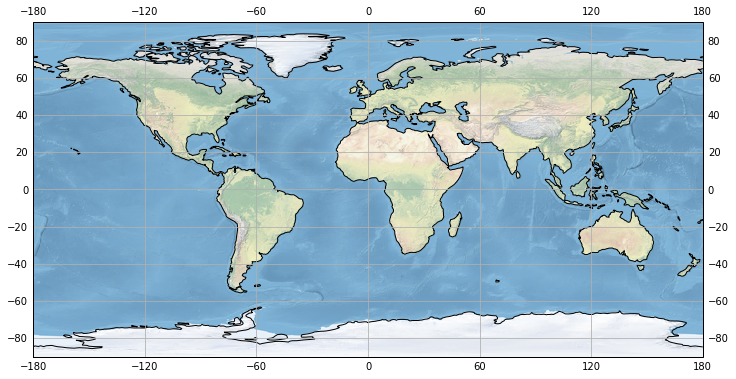

In [3]:
plt.figure(figsize = (12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()
ax.gridlines(draw_labels=True)
plt.show()

Of course, we could zoom in the map to any places on the Earth using *ax.set_extent* function, which takes a list with the first two numbers are the x-axis limits and the last two numbers are the y-axis limits.

**TRY IT!** Zoom in the map to US. 

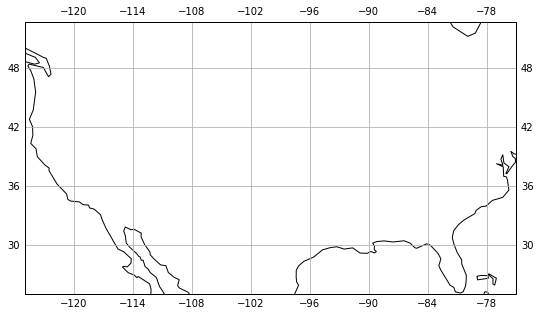

In [4]:
plt.figure(figsize = (10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-125, -75, 25, 50])
ax.gridlines(draw_labels=True)
plt.show()

One thing we notice that there is no features added on the map, such as the country boarder, state boundary, lakes/water, and so on. In cartopy, all these features need us to specify to add. 

**TRY IT!** For the US map we made above, add features: land, ocean, states and country borders, lakes and rivers. 

In [5]:
import cartopy.feature as cfeature

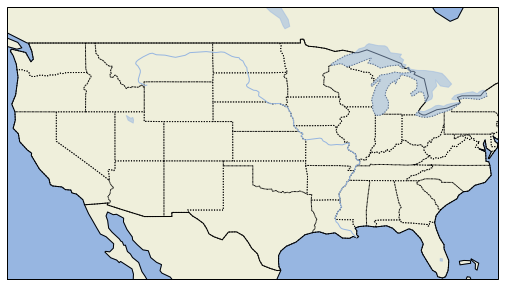

In [6]:
plt.figure(figsize = (10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-125, -75, 25, 50])

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.STATES, linestyle=':')
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

plt.show()

We could zoom in further to a smaller area, but then we need to download and use the high-resolution coastlines and land to have a good-looking map. 

**TRY IT!** Plot the San Francisco Bay Area with the 10m-resolution coast lines and land. Try to change one of them to 50m and see what will happen. 

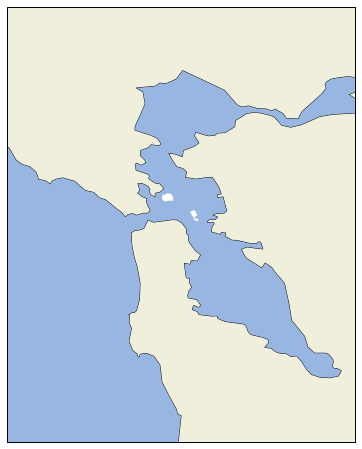

In [7]:
plt.figure(figsize = (10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.set_extent([-122.8, -122, 37.3, 38.3])

# we can add high-resolution land
LAND = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'],
                                        linewidth=.1
                                   )
# we can add high-resolution water
OCEAN = cfeature.NaturalEarthFeature('physical', 'ocean', '10m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['water'],
                                        linewidth=.1
                                   )

ax.add_feature(LAND, zorder=0)
ax.add_feature(OCEAN)

plt.show()

Of course, in many cases, we want to plot our data onto the map and show the spatial location of some entities or others. Data can be added to it in exactly the same way as with normal matplotlib axes. By default, the coordinate system of any data added to is the same as the coordinate system of the axes we defined at the beginning of the plot. Let's first try to add some data to the map above. 

**TRY IT!** Add UC Berkeley and Stanford University on the Bay Area map above.  

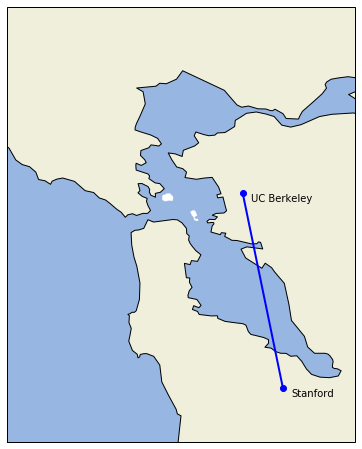

In [8]:
plt.figure(figsize = (10, 8))

# plot the map related stuff
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.set_extent([-122.8, -122, 37.3, 38.3])

# we can add high-resolution land
ax.add_feature(LAND, zorder=0)
ax.add_feature(OCEAN, zorder=0)

# plot the data related stuff
berkeley_lon, berkeley_lat = -122.2585, 37.8719
stanford_lon, stanford_lat = -122.1661, 37.4241

# plot the two universities as blue dots
ax.plot([berkeley_lon, stanford_lon], [berkeley_lat, stanford_lat],
         color='blue', linewidth=2, marker='o')

# add labels for the two universities
ax.text(berkeley_lon + 0.16, berkeley_lat - 0.02, 'UC Berkeley',
         horizontalalignment='right')

ax.text(stanford_lon + 0.02, stanford_lat - 0.02, 'Stanford',
         horizontalalignment='left')

plt.show()

There are many other things we could plot with cartopy package, you can find the official -[example gallery](https://scitools.org.uk/cartopy/docs/latest/gallery/index.html) and learn more of making nice maps. 

<!--NAVIGATION-->
< [12.2 3D Plotting](chapter12.02-3D-Plotting.ipynb) | [Contents](Index.ipynb) | [12.4 Animations and Movies](chapter12.04-Animaitons-and-Movies.ipynb) >